In [ ]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing all the neccessary libraries

import pandas as pd # To load files and perform tasks
import numpy as np # linear algebra
import seaborn as sns  # data visualizations
import matplotlib.pyplot as plt # data visualizations
import plotly  #  interactive plotting library 

In [ ]:
# Loading the dataset into the pandas dataframe (cleaned dataset)

df = pd.read_csv("/content/drive/MyDrive/TEXT/df_jobs_city_state/final.csv",encoding = "latin1")
#df = df.drop("index",axis=1) # I droped the 'index' column because I don't need it.
df.head(2)

,Unnamed: 0,Job Title,Job Title final,Salary Estimate,Salary_Estimate_low,Salary_Estimate_high,Salary_Estimate_average,Job Description,Rating,Company Name,...,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,low,high,mid
0,5618,Data Engineer,Data Engineer,80K-150K (Glassdoor est.),80,150,115.0,Company Description Sagence is a management ad...,4.5,Sagence\n4.5,...,2009,Company - Private,Consulting,Business Services,10 to 25 million (USD),"WCI Consulting, PwC",-1,3.0,4.0,4.0
1,5619,Senior Data Engineer (Healthcare Domain experi...,Data Engineer,80K-150K (Glassdoor est.),80,150,115.0,Key Responsibilities Architect build and maint...,3.4,Enterprise Integration\n3.4,...,1998,Company - Private,IT Services,Information Technology,25 to 50 million (USD),-1,-1,3.0,4.0,4.0


In [ ]:
# Looking at some overall information and statistics about the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15103 entries, 0 to 15102
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               15103 non-null  int64  
 1   Job Title                15103 non-null  object 
 2   Job Title final          15103 non-null  object 
 3   Salary Estimate          15103 non-null  object 
 4   Salary_Estimate_low      15103 non-null  int64  
 5   Salary_Estimate_high     15103 non-null  int64  
 6   Salary_Estimate_average  15103 non-null  float64
 7   Job Description          15102 non-null  object 
 8   Rating                   15103 non-null  float64
 9   Company Name             15103 non-null  object 
 10  Location_city            15103 non-null  object 
 11  Location_state           15103 non-null  object 
 12  Headquarters             15103 non-null  object 
 13  Size                     15103 non-null  object 
 14  Founded               

In [ ]:
# Provide a summary of the numerical information...

df.describe()

,Unnamed: 0,Salary_Estimate_low,Salary_Estimate_high,Salary_Estimate_average,Rating,Founded,low,high,mid
count,15103.000000,15103.000000,15103.000000,15103.000000,15103.000000,15103.000000,15103.000000,15103.000000,15103.000000
mean,7807.753493,65.445805,109.024697,87.235251,3.303450,1460.743097,2.478051,2.490035,2.555982
std,4565.041569,28.537621,40.701092,33.623655,1.544218,869.338898,1.160206,1.135685,1.165727
min,0.000000,12.000000,37.000000,33.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000
25%,3777.500000,44.000000,79.000000,62.000000,3.200000,-1.000000,1.000000,1.000000,1.000000
50%,7784.000000,57.000000,99.000000,78.500000,3.700000,1981.000000,3.000000,2.000000,3.000000
75%,11784.500000,81.000000,134.000000,106.500000,4.100000,2002.000000,4.000000,4.000000,4.000000
max,15725.000000,200.000000,281.000000,225.000000,5.000000,2020.000000,4.000000,4.000000,4.000000


In [ ]:
df=df.drop(df.loc[df['Location_state']==' United Kingdom'].index)
df=df.drop(df.loc[df['Location_state']==' Los Angeles'].index)

In [ ]:
from IPython.core.pylabtools import figsize
import matplotlib
from matplotlib import rcParams

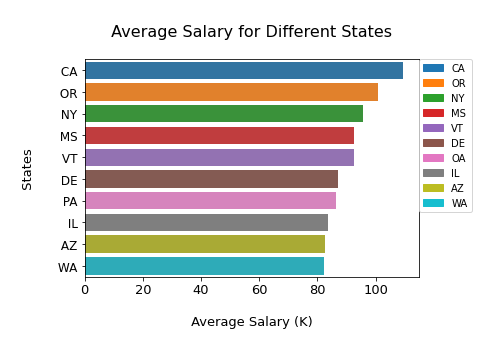

In [ ]:
#Making a DF of Average Salary of top 10 states in which job postings was maximum.

g = df.groupby("Location_state")["Salary_Estimate_average"].mean().sort_values(ascending=False)[0:10]
g = g.reset_index().rename(columns={"Location_state":"Location_state","Salary_Estimate_average":"Average Salary"})

# Plotting the average salary per annum for different states.
lab=["CA","OR","NY","MS","VT","DE","OA","IL","AZ","WA"]

sns.barplot(y="Location_state", x = "Average Salary",data=g)

#Beautifying the plot

plt.title('\n Average Salary for Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Average Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n States \n', fontsize=13, color='black')
patches = [matplotlib.patches.Patch(color=sns.color_palette()[i], label=j) for i,j in zip(range(0,10),lab)]
plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

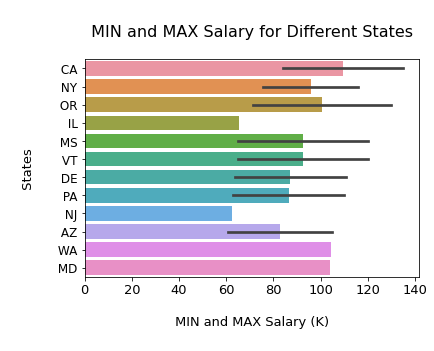

In [ ]:
#Making a DF of min Salary of top 10 states in which job postings was maximum.

g1 = df.groupby("Location_state")["Salary_Estimate_low"].mean().sort_values(ascending=False)[0:10]
g1 = g1.reset_index().rename(columns={"Location_state":"Location_state","Salary_Estimate_low":"Salary"})
g2 = df.groupby("Location_state")["Salary_Estimate_high"].mean().sort_values(ascending=False)[0:10]
g2 = g2.reset_index().rename(columns={"Location_state":"Location_state","Salary_Estimate_high":"Salary"})
concatenated = pd.concat([g1.assign(dataset='g1'), g2.assign(dataset='g2')])



sns.barplot(y="Location_state", x = "Salary",data=concatenated)

#Beautifying the plot

plt.title('\n MIN and MAX Salary for Different States \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n MIN and MAX Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n States \n', fontsize=13, color='black')

# plt.legend(handles=patches,bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

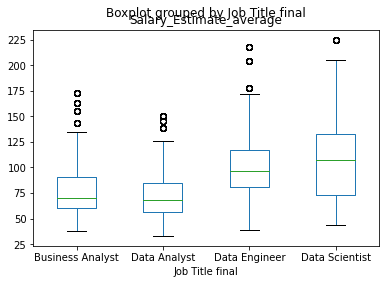

In [ ]:
df.boxplot(by='Job Title final',column =['Salary_Estimate_average'], grid = False)

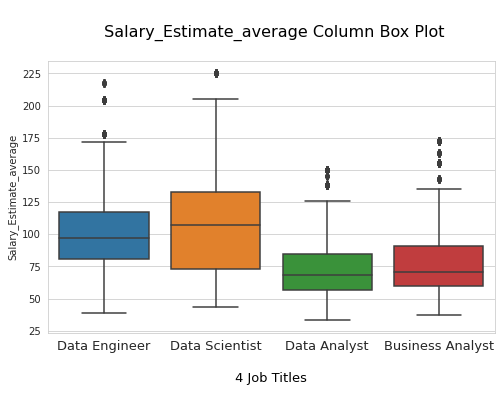

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))  
sns.boxplot(x = 'Job Title final', y = 'Salary_Estimate_average', data = df )
plt.title('\n Salary_Estimate_average Column Box Plot\n', size=16, color='black')
plt.xlabel('\n 4 Job Titles \n', fontsize=13, color='black')
plt.xticks(fontsize=13)
plt.show()

In [ ]:
df['Location_state1'].append(df['Location_state']=='CA')
df_test2 = df[["Location_state1","Salary_Estimate_low","Job Title final"]]
sns.catplot(x="Salary_Estimate_low", y="Location_state1",kind="violin", data=df_test2["Salary_Estimate_low"])

ValueError: ignored

In [ ]:
df_test

,Location_state1,Salary_Estimate_low,Job Title final
0,False,80,Data Engineer
1,False,80,Data Engineer
2,False,80,Data Engineer
3,False,80,Data Engineer
4,False,80,Data Engineer
...,...,...,...
15098,False,58,Business Analyst
15099,False,58,Business Analyst
15100,False,58,Business Analyst
15101,False,58,Business Analyst


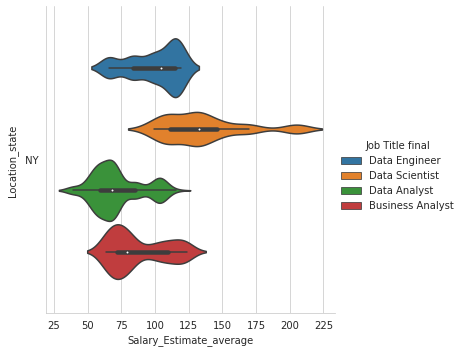

In [ ]:
df_test2 = df.loc[df['Location_state']==' NY']
sns.catplot(x="Salary_Estimate_average", y="Location_state",kind="violin",hue="Job Title final", data=df_test2)

In [ ]:
df_test2 = df.loc[df['Location_state']==' CA']
df_test2

,Unnamed: 0,Job Title,Job Title final,Salary Estimate,Salary_Estimate_low,Salary_Estimate_high,Salary_Estimate_average,Job Description,Rating,Company Name,...,Industry,Sector,Revenue,Competitors,Easy Apply,low,high,mid,Job Title final1,Location_state1
200,5818,Data Reliability Engineer,Data Engineer,88K-136K (Glassdoor est.),88,136,112.0,SUMMARY Hulus Data Reliability Engineering tea...,3.8,Hulu\n3.8,...,TV Broadcast & Cable Networks,Media,1 to 2 billion (USD),"Netflix, Amazon, Apple",-1,3.0,3.0,4.0,False,False
201,5819,Data Engineer,Data Engineer,88K-136K (Glassdoor est.),88,136,112.0,Who we are Albert is a new type of financial s...,5.0,Albert (CA)\n5.0,...,Financial Analytics & Research,Finance,Unknown / Non-Applicable,-1,-1,3.0,3.0,4.0,False,False
202,5820,Data Engineer,Data Engineer,88K-136K (Glassdoor est.),88,136,112.0,Click Apply for this Job below to submit your ...,4.4,Direct Agents\n4.4,...,Advertising & Marketing,Business Services,25 to 50 million (USD),-1,TRUE,3.0,3.0,4.0,False,False
203,5821,Data Engineer,Data Engineer,88K-136K (Glassdoor est.),88,136,112.0,Join SADA a a Data Engineer Your Mission As a ...,4.7,SADA\n4.7,...,IT Services,Information Technology,50 to 100 million (USD),-1,-1,3.0,3.0,4.0,False,False
204,5822,Data Engineer,Data Engineer,88K-136K (Glassdoor est.),88,136,112.0,Do you believe that people with compassion wil...,4.5,CrowdRise\n4.5,...,Internet,Information Technology,Unknown / Non-Applicable,-1,-1,3.0,3.0,4.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14822,15385,Senior Revenue Analyst,Business Analyst,85K-130K (Glassdoor est.),85,130,107.5,Company Industry Media Entertainment Opportuni...,4.9,The Mom Project\n4.9,...,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1,4.0,4.0,4.0,False,False
14823,15386,"SAP MDG Business Analyst , Master Data Management",Business Analyst,85K-130K (Glassdoor est.),85,130,107.5,Company Description Security Job Description J...,3.7,Infotree Service Inc\n3.7,...,Advertising & Marketing,Business Services,1 to 5 million (USD),-1,-1,4.0,4.0,4.0,False,False
14824,15387,Sr. Salesforce Business Systems Analyst,Business Analyst,85K-130K (Glassdoor est.),85,130,107.5,Job Description The Information Systems and Se...,3.3,"FireEye, Inc.\n3.3",...,Computer Hardware & Software,Information Technology,Unknown / Non-Applicable,"Palo Alto Networks, Tanium",-1,4.0,4.0,4.0,False,False
14825,15388,Sr. Business Systems Analyst,Business Analyst,85K-130K (Glassdoor est.),85,130,107.5,Job Duties With a high level of independent de...,3.6,Xoriant\n3.6,...,IT Services,Information Technology,100 to 500 million (USD),"Persistent Systems (India), GlobalLogic, Synec...",-1,4.0,4.0,4.0,False,False


In [ ]:
df['Location_state']

0         NY
1         NY
2         NY
3         NY
4         NY
        ... 
15098     TX
15099     TX
15100     TX
15101     TX
15102     TX
Name: Location_state, Length: 15098, dtype: object